In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit
import pandas as pd
import peakutils
from peakutils.plot import plot as pplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [3]:
def read(filename):
    from numpy import array as array
    df = pd.read_csv(filename,skiprows=1,names=["Width in A","Voltage in V"],sep="\t")
    data = [[],[]]

    for i in range(2):
        for k in range(len(df.iloc[0:,i])):
            data[i].append((df.iloc[k,i].replace(",",".")))
    for i in range(len(data)):
        for k in range(len(data[i])):
            try:
                #print(i,k, data[i][k])
                data[i][k] = float(data[i][k])
            except ValueError:
                data[i][k] = 0
    for i in range(len(data)):
        data[i]= array(data[i])
    return data
[pos, inte] = range(2)
data = read("abs30.csv")

In [4]:
def fit_pm(x, y, func=lambda x: x, p0=None, sigma=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2
    
def linfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0, sigma=sigma)

In [5]:
def fit(x, y, func=lambda x: x, p0=None, r=None, d=None, sigma=None):
    """
        fit takes data points, calculates the curve fit, and gives back
        the values with which the curve can be plotted
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: the function type the curve_fit will be applied to.
        r: determines the size of steps in which the x-achse intervall is split.
        d: tuple which determines the start and end point of the x-achse intervall on which the
            will be drawn. If not given the curve will be drawn between the largest and the smalest
            given x-value.
        Returns:
        -----------
        xnew: x-value with which the fitted curve can be plotted.
        ynew: y-value with which the fitted curve can be plotted.
    """
    import numpy as np
    from scipy.optimize import curve_fit
    popt, pvoc = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    if d == None:
        if r == None:
            xnew = np.arange(min(x), max(x), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(x), max(x), r)
    else:
        if r == None:
            xnew = np.arange(min(d), max(d), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(d), max(d), r)
    ynew = func(xnew, *params)
    return xnew, ynew

def linfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, a, b,: a * x + b, r=r, d=d, p0=p0, sigma=sigma)

In [6]:
def error(arr):
    arr_error = []
    arr_value = []
    for i in range(len(arr)):
        arr_error.append(arr[i].std_dev)
        arr_value.append(arr[i].nominal_value)
    return arr_error, arr_value

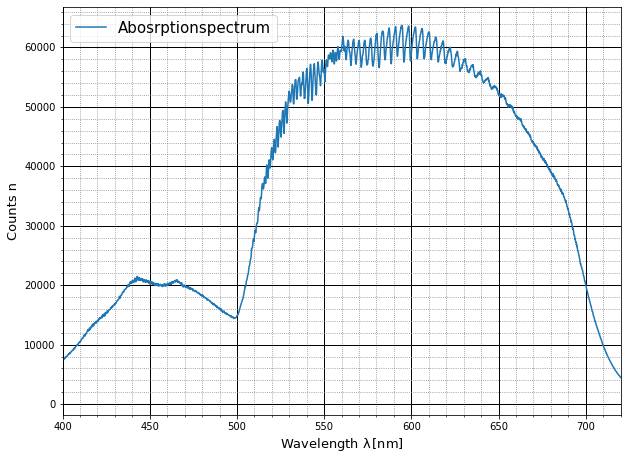

In [31]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(data[0],np.array(data[1]),label='Abosrptionspectrum')

indexes = peakutils.indexes(-1*np.array(data[1][610:1000]), thres=0.22, min_dist=2)
#print(indexes)
y = -1*np.array(data[1][610:1000])
x = data[0][610:1000]
#print(x[indexes], y[indexes])
#pyplot.figure(figsize=(10,6))
#pplot(x, -y, indexes)
#pyplot.title('First estimate')
x = x[indexes]
y = -y[indexes]

#plt.plot(x,y,'x',label='Transition Minima')
#plt.plot(data[0], np.array(data[1]))
#plt.plot(data[0][610:1000],np.array(data[1][610:1000]),label='Abosrptionspectrum')

###   Label / Title

plt.ylabel(r'Counts n', fontsize=13)
plt.xlabel(r'Wavelength $\mathrm{\lambda}\,$[nm]', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([400,720])
#axes.set_xlim([490,520])
#axes.set_ylim([20000,60000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('AS_1.png')
plt.show()

[509.77 510.81 511.68 512.72 513.94 515.15 516.36 517.75 518.96 520.51
 522.06 523.61 525.32 527.04 528.58 530.63 532.51 534.38 536.42 538.62
 540.82 543.02 545.55] [-27326.61 -28825.8  -30461.29 -32511.45 -34539.83 -36183.82 -37101.24
 -38004.76 -39698.22 -41106.91 -42272.18 -43230.71 -44904.66 -45531.46
 -47263.45 -50788.61 -50483.09 -51276.69 -51819.62 -51422.66 -50570.71
 -51101.07 -51992.66]


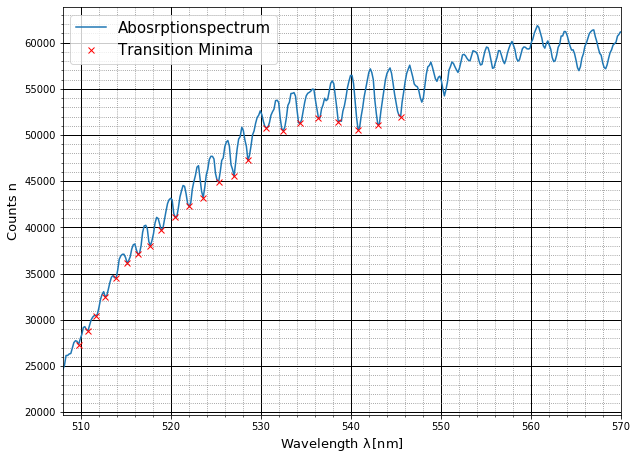

In [39]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

#plt.plot(data[0],-1*np.array(data[1]))

indexes = peakutils.indexes(-1*np.array(data[1][610:1000]), thres=0.22, min_dist=2)
#print(indexes)
y = -1*np.array(data[1][610:1000])
x = data[0][610:1000]
print(x[indexes], y[indexes])
#pyplot.figure(figsize=(10,6))
#pplot(x, -y, indexes)
#pyplot.title('First estimate')
x = x[indexes]
y = -y[indexes]

#plt.plot(data[0], np.array(data[1]))
plt.plot(data[0][610:1000],np.array(data[1][610:1000]),label='Abosrptionspectrum')
plt.plot(x,y,'x',label='Transition Minima',color='red')

###   Label / Title

plt.ylabel(r'Counts n', fontsize=13)
plt.xlabel(r'Wavelength $\mathrm{\lambda}\,$[nm]', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([508,570])
#axes.set_ylim([20000,60000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('AS_2.png')
plt.show()

In [69]:
for i in range(len(x)):
    print('$','{:L}'.format(ufloat(x[i],0.5)),'$')
    print(i)

$ 509.8 \pm 0.5 $
0
$ 510.8 \pm 0.5 $
1
$ 511.7 \pm 0.5 $
2
$ 512.7 \pm 0.5 $
3
$ 513.9 \pm 0.5 $
4
$ 515.1 \pm 0.5 $
5
$ 516.4 \pm 0.5 $
6
$ 517.8 \pm 0.5 $
7
$ 519.0 \pm 0.5 $
8
$ 520.5 \pm 0.5 $
9
$ 522.1 \pm 0.5 $
10
$ 523.6 \pm 0.5 $
11
$ 525.3 \pm 0.5 $
12
$ 527.0 \pm 0.5 $
13
$ 528.6 \pm 0.5 $
14
$ 530.6 \pm 0.5 $
15
$ 532.5 \pm 0.5 $
16
$ 534.4 \pm 0.5 $
17
$ 536.4 \pm 0.5 $
18
$ 538.6 \pm 0.5 $
19
$ 540.8 \pm 0.5 $
20
$ 543.0 \pm 0.5 $
21
$ 545.5 \pm 0.5 $
22


In [68]:
G = 1/(unp.uarray(x,0.1) * 10**-7)
l = []
n = []
o = arange(25.5,47.5,1)
for i in range(len(G)-1):
    l.append(G[i] - G[i+1])
for i in range((len(o))):
    n.append(o[-(i+1)])
l = np.array(l)
for i in range(len(G)):
    print('$','{:L}'.format(G[i]),'$')
    print(i)

$ 19617 \pm 4 $
0
$ 19577 \pm 4 $
1
$ 19543 \pm 4 $
2
$ 19504 \pm 4 $
3
$ 19458 \pm 4 $
4
$ 19412 \pm 4 $
5
$ 19366 \pm 4 $
6
$ 19314 \pm 4 $
7
$ 19269 \pm 4 $
8
$ 19212 \pm 4 $
9
$ 19155 \pm 4 $
10
$ 19098 \pm 4 $
11
$ 19036 \pm 4 $
12
$ 18974 \pm 4 $
13
$ 18919 \pm 4 $
14
$ 18846 \pm 4 $
15
$ 18779.0 \pm 3.5 $
16
$ 18713.3 \pm 3.5 $
17
$ 18642.1 \pm 3.5 $
18
$ 18566.0 \pm 3.4 $
19
$ 18490.4 \pm 3.4 $
20
$ 18415.5 \pm 3.4 $
21
$ 18330.1 \pm 3.4 $
22


In [70]:
for i in range(len(l)):
    print('$','{:L}'.format(l[i]),'$')

$ 40 \pm 5 $
$ 33 \pm 5 $
$ 40 \pm 5 $
$ 46 \pm 5 $
$ 46 \pm 5 $
$ 45 \pm 5 $
$ 52 \pm 5 $
$ 45 \pm 5 $
$ 57 \pm 5 $
$ 57 \pm 5 $
$ 57 \pm 5 $
$ 62 \pm 5 $
$ 62 \pm 5 $
$ 55 \pm 5 $
$ 73 \pm 5 $
$ 67 \pm 5 $
$ 66 \pm 5 $
$ 71 \pm 5 $
$ 76 \pm 5 $
$ 76 \pm 5 $
$ 75 \pm 5 $
$ 85 \pm 5 $


(array([-2.0890926350709043+/-0.1336477304980328,
       133.68871748702634+/-4.820300763106733], dtype=object), 0.9241918628782224)


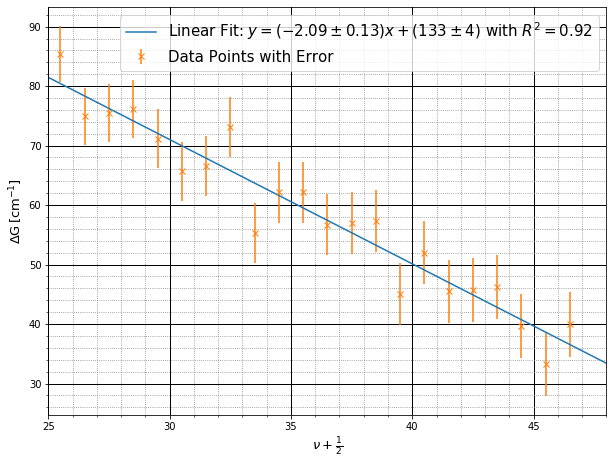

In [33]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

#plt.plot(data[0],-1*np.array(data[1]))

#plt.plot(n,error(l)[1],'x')

xnew,ynew = linfit(n, error(l)[1], sigma=error(l)[0],d=(25,50))
k = linfit_pm(n, error(l)[1], sigma=error(l)[0])
print(k)
plt.plot(xnew,ynew,label=r'Linear Fit: $y=(-2.09 \pm 0.13)x+(133\pm 4)$ with $R^2=0.92$')
plt.errorbar(n,error(l)[1],error(l)[0],fmt='x',label='Data Points with Error')

#plt.plot(n[0:16]+n[19:],l[0:16]+l[19:],'x')
#plt.plot(n[16:19],l[16:19],'x')

###   Label / Title

plt.ylabel(r'$\Delta \mathrm{G}\,[\mathrm{cm}^{-1}]$', fontsize=13)
plt.xlabel(r'$\nu+\frac{1}{2}$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([25,48])
#axes.set_ylim([20000,60000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('AS_3.png')
plt.show()

In [25]:
omega_x = -k[0][0]/2
omega = k[0][1] + omega_x
D_e = omega**2/(4*omega_x)
v_diss = -k[0][1]/k[0][0]
print(omega,omega_x,D_e,v_diss)
D_e_1_e = D_e.std_dev
D_e_1_v = D_e.nominal_value
D_e_1_e/D_e_1_v

135+/-5 1.04+/-0.07 (4.3+/-0.4)e+03 64+/-5


0.09532372601021008

In [51]:
p = np.arange(0.5,64.5,1)
#d_y = k[0][1] + p * k[0][0]
d_y = ufloat(-2.0890926350709043,0.1336477304980328) * p + ufloat(133.68871748702634,4.820300763106733)
d_y_e = error(d_y)
G_0 = 0.5*omega-0.25*omega_x
D_0 = sum(unp.uarray(d_y_e[1],d_y_e[0]))
D_e_2 = D_0+G_0
print(D_0)
print(G_0)
print(D_e_2)
D_e_2_e = D_e_2.std_dev
D_e_2_v = D_e_2.nominal_value
D_e_2_e/D_e_2_v

(4.28+/-0.06)e+03
67.1+/-2.4
(4.34+/-0.06)e+03


0.01271864389271714

(array([64], dtype=int64),)
[498.22]


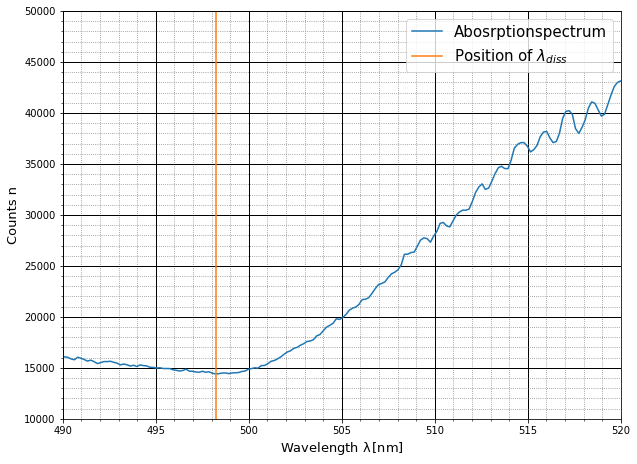

In [34]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(data[0][500:800],np.array(data[1][500:800]),label='Abosrptionspectrum')
t = np.where(data[1][500:800]==min(data[1][500:800]))
print(t)
data_min = data[0][500:800]
t_2 = data_min[t]
print(t_2)
plt.plot([t_2,t_2+0.000001],[0,500000],label=r'Position of $\lambda_{diss}$')

###   Label / Title

plt.ylabel(r'Counts n', fontsize=13)
plt.xlabel(r'Wavelength $\mathrm{\lambda}\,$[nm]', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([490,520])
axes.set_ylim([10000,50000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('AS_4.png')
plt.show()

In [52]:
E = 1/(ufloat(t_2,1)*10**-7)
T = E - D_0
print(E)

(2.007+/-0.004)e+04


In [29]:
T

15793.838175039724+/-68.34275880177375

(1.98+/-0.06)e+09 (3.029+/-0.004)e-10


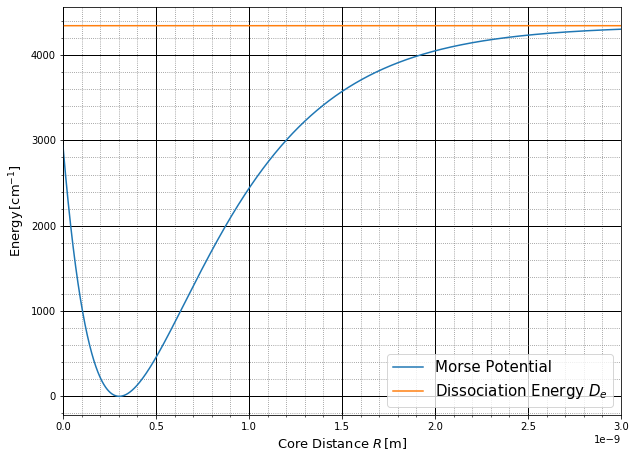

In [53]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

c = 299792485
µ = 1.05327e-25
Be = ufloat(2.897,0.007)
h = 1.054571817e-34
a = unp.sqrt((omega_x*4*pi*c*µ)/(h))
R_e = unp.sqrt(h/(4*pi*c*µ*Be))
R_e_v = sqrt((h/(4*pi*c*µ*Be)).nominal_value)
a_v = sqrt(((omega_x*4*pi*c*µ)/(h)).nominal_value)
x_morse = np.arange(0,0.3e-8,0.001e-9)
print(a,R_e)
plt.plot(x_morse, D_e.nominal_value*(1 - e**(-a_v*(x_morse-R_e_v)))**2,label='Morse Potential')
plt.plot(x_morse, D_e.nominal_value+0*x_morse,label=r'Dissociation Energy $D_e$')
###   Label / Title

plt.ylabel(r'Energy$\,[\mathrm{cm}^{-1}]$', fontsize=13)
plt.xlabel(r'Core Distance $R\,$[m]', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([0,0.3e-8])
#axes.set_ylim([10000,50000])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('Morse.png')
plt.show()

In [46]:
h = ufloat(0.5,0.06)
print(1/h)

2.00+/-0.24


In [48]:
0.06/0.5**2

0.24

In [49]:
0.1336477304980328/2

0.0668238652490164